In [1]:
import importlib
import sys
import pickle
import numpy as np

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')

In [2]:
import src.evaluation_metrics.conduct_evaluation
importlib.reload(src.evaluation_metrics.conduct_evaluation)

import src.evaluation_metrics.metrics
importlib.reload(src.evaluation_metrics.metrics)

<module 'src.evaluation_metrics.metrics' from '/home/PSPLab/ProbabilisticSuffixPredictionLab/Probabilistic_Suffix_Prediction_U-ED-LSTM_pub/src/notebooks/evaluation_metric_notebooks/eval_proactive/BPIC20/../../../../../src/evaluation_metrics/metrics.py'>

In [3]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

output_dirs = ['../../../../../../../data/BPIC20/proact_conf_check/eval_test_set/']

all_results = dict()

for output_dir in output_dirs:
    evaluation_metrics = {
        'NormalizedDamerauLevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceMeanVar('concept:name', percentile=0.25),
        # 'RemainingTime_SUM_Mean_MAE_outliers' : src.evaluation_metrics.metrics.SumValueMeanMAE('event_elapsed_time', percentile=0.25, value_factor = 3600*24),
        # 'RemainingTime_SUM_Abs_Mean_MAE_outliers' : src.evaluation_metrics.metrics.SumAbsValueMeanMAE('event_elapsed_time', percentile=0.25, value_factor = 3600*24),
        'RemainingTime_LastEvent_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.25, value_factor = 3600*24),
        'RemainingTime_PIT' : src.evaluation_metrics.metrics.LastValuePIT('case_elapsed_time'),
        # 'EventElapsed_PIT' : src.evaluation_metrics.metrics.SumValuesPIT('event_elapsed_time'),
        'SuffixCountMAE' : src.evaluation_metrics.metrics.SuffixCountMAE(percentile=0.18),

        # 'SumValuesInterval_50' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.5),
        # 'SumValuesInterval_75' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.75),
        # 'SumValuesInterval_90' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.90),
        # 'SumValuesInterval_95' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.95),
        # 'SumValuesInterval_99' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.99),

        'LastValueInterval_50' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.50),
        'LastValueInterval_75' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.75),
        'LastValueInterval_90' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.90),
        'LastValueInterval_95' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.95),
        'LastValueInterval_99' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.99),

        'SuffixCountInterval_50' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.50),
        'SuffixCountInterval_75' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.75),
        'SuffixCountInterval_90' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.90),
        'SuffixCountInterval_95' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.95),
        'SuffixCountInterval_99' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.99),

        # 'EventLabelCountInterval_50' : src.evaluation_metrics.metrics.EventLabelCountInterval('concept:name', event_label_list, percentile=0.50),
        # 'EventLabelCountInterval_75' : src.evaluation_metrics.metrics.EventLabelCountInterval('concept:name', event_label_list, percentile=0.75),
        # 'EventLabelCountInterval_90' : src.evaluation_metrics.metrics.EventLabelCountInterval('concept:name', event_label_list, percentile=0.90),
        # 'EventLabelCountInterval_95' : src.evaluation_metrics.metrics.EventLabelCountInterval('concept:name', event_label_list, percentile=0.95),
        # 'EventLabelCountInterval_99' : src.evaluation_metrics.metrics.EventLabelCountInterval('concept:name', event_label_list, percentile=0.99),

    }

    #res_raw, c = src.evaluation_metrics.conduct_evaluation.batch_evaluate(output_dir, evaluation_metrics)
    res_raw, c = src.evaluation_metrics.conduct_evaluation.evaluate_sequentially(output_dir, evaluation_metrics)
    all_results[output_dir] = (res_raw, c)


with open("BPIC20_eval.pkl", "wb") as file:
    pickle.dump(all_results, file)


Loaded: results_part_050.pkl
Loaded: results_part_100.pkl
Loaded: results_part_1000.pkl
Loaded: results_part_1050.pkl
Loaded: results_part_1100.pkl
Loaded: results_part_1150.pkl
Loaded: results_part_1200.pkl
Loaded: results_part_1250.pkl
Loaded: results_part_1300.pkl
Loaded: results_part_1350.pkl
Loaded: results_part_1400.pkl
Loaded: results_part_1450.pkl
Loaded: results_part_150.pkl
Loaded: results_part_1500.pkl
Loaded: results_part_1550.pkl
Loaded: results_part_1600.pkl
Loaded: results_part_1650.pkl
Loaded: results_part_1700.pkl
Loaded: results_part_1750.pkl
Loaded: results_part_1800.pkl
Loaded: results_part_1850.pkl
Loaded: results_part_1900.pkl
Loaded: results_part_1950.pkl
Loaded: results_part_200.pkl
Loaded: results_part_2000.pkl
Loaded: results_part_2050.pkl
Loaded: results_part_2100.pkl
Loaded: results_part_2150.pkl
Loaded: results_part_2200.pkl
Loaded: results_part_2250.pkl
Loaded: results_part_2300.pkl
Loaded: results_part_2350.pkl
Loaded: results_part_2400.pkl
Loaded: result

dict_keys(['NormalizedDamerauLevenshteinMeanVar_activity', 'RemainingTime_LastEvent_Mean2_Var_seconds_outliers', 'RemainingTime_PIT', 'SuffixCountMAE', 'LastValueInterval_50', 'LastValueInterval_75', 'LastValueInterval_90', 'LastValueInterval_95', 'LastValueInterval_99', 'SuffixCountInterval_50', 'SuffixCountInterval_75', 'SuffixCountInterval_90', 'SuffixCountInterval_95', 'SuffixCountInterval_99'])
14
2
2
dict_keys([('SuffixCountMAE', 'Suffix length MAE'), ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS')])


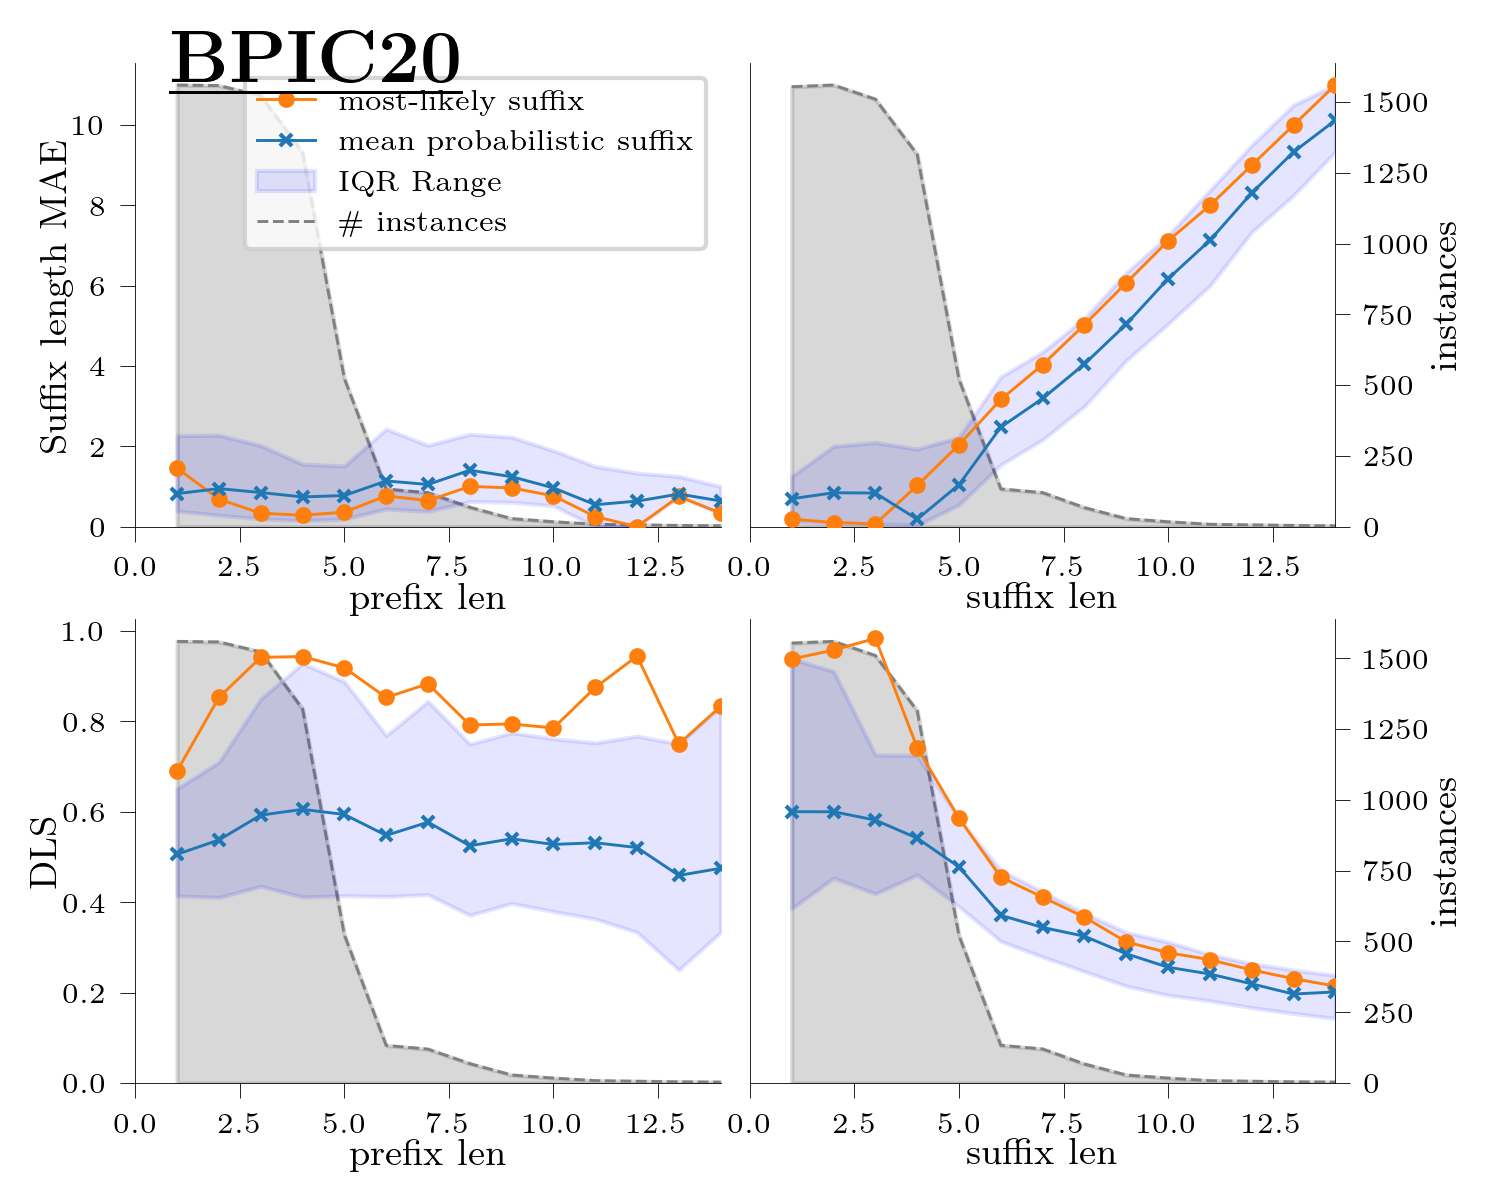

In [4]:
with open("BPIC20_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../../data/BPIC20/proact_conf_check/eval_test_set/']

keys_to_keep = [
                ('SuffixCountMAE', 'Suffix length MAE'),
                #'LevenshteinMeanVar_activity',
                ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS'),
                #('FakedNormalizedDamerauLevenshteinMeanVar_activity', '123'),
                #'RemainingTime_MAE_Median_Var_seconds',
                #'RemainingTime_MAE_Median2_Var_seconds',
                #'RemainingTime_MAE_Mean_Var_seconds',
                #'RemainingTime_MAE_Mean2_Var_seconds',
                #'RemainingTime_MAE_Mean2_Var_seconds_outliers',
                
                #'RemainingTime_MSE_Median_Var_seconds',
                #'RemainingTime_MSE_Median2_Var_seconds',
                #'RemainingTime_MSE_Mean_Var_seconds',
                #'RemainingTime_MSE_Mean2_Var_seconds',
                #'RemainingTime_MSE_Mean2_Var_seconds_outlier'

                #'RemainingTime_SUM_Mean_MSE',
                #('RemainingTime_SUM_Abs_Mean_MAE_outliers', 'Remaining time MAE (days)'),
                # ('RemainingTime_SUM_Mean_MAE_outliers', 'Rem. time (event sum) MAE (days) ')
                #'RemainingTime_SUM_Mean_MAE_2',


                #'RemainingTime_MAE_Mean2_Var_seconds_outliers',
                #'RemainingTime_MAE_Mean2_Var_seconds_3.5',
                #'RemainingTime_MAE_Mean2_Var_seconds_2.5',
                #'RemainingTime_MAE_Mean2_Var_seconds_2',

                #'RemainingTime_MSE_Mean2_Var_seconds_outliers',
                #'RemainingTime_MSE_Mean2_Var_seconds_3.5',
                #'RemainingTime_MSE_Mean2_Var_seconds_2.5',
                #'RemainingTime_MSE_Mean2_Var_seconds_2'
]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}
print(res_raw.keys())
print(len(res_raw.keys()))
print(len(res.keys()))
print(len(keys_to_keep))
print(res.keys())
p = src.evaluation_metrics.plots.plot_res(res, c, columns=2, caption='BPIC20', pgf=True)
with open('BPIC20.pgf', 'wb') as f:
    f.write(p)

In [5]:
print('Suffix length MAE')
print(np.mean([i['mean'] for i in res_raw['SuffixCountMAE'].values()]))
print('Probabilistic suffix length MAE')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountMAE'].values()]))

print('DLS')
print(np.mean([i['mean'] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))
print('Probabilistic DLS')
print(np.mean([i['prob'][0] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))

# print('Mean MAE sum remaining time:')
# print(np.mean([i['mean'] for i in res_raw['RemainingTime_SUM_Mean_MAE_outliers'].values()]))
# print('Probabilistic MAE sum remaining time:')
# print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_SUM_Mean_MAE_outliers'].values()]))

print('Mean MAE last event:')
print(np.mean([i['mean'] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))
print('Probabilistic MAE last event:')
print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))


Suffix length MAE
0.6838558452973923
Probabilistic suffix length MAE
0.8536829768532083
DLS
0.8576281553684132
Probabilistic DLS
0.5605510428953148
Mean MAE last event:
5.1157872411590075
Probabilistic MAE last event:
7.1597812003158365


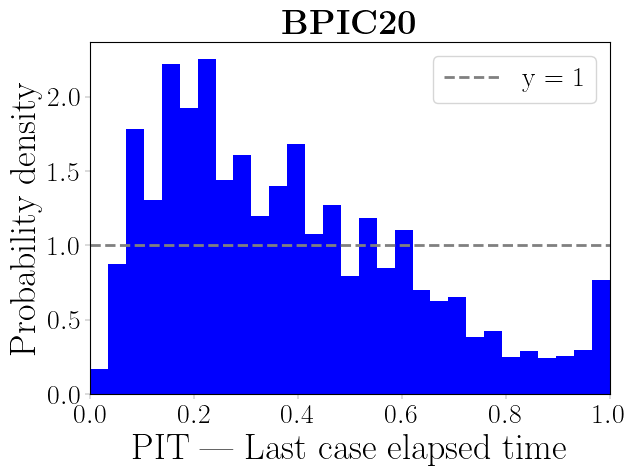

In [7]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

# with open('BPIC20_PIT_event_elapsed.pgf', 'wb') as f:
#     r = src.evaluation_metrics.plots.plot_pits(res_raw['EventElapsed_PIT'], caption='BPIC20', x_label='Sum of event processing times', pgf=True)
#    f.write(r)

with open('BPIC20_PIT_remaining_time.pgf', 'wb') as f:
    r = src.evaluation_metrics.plots.plot_pits(res_raw['RemainingTime_PIT'], caption='BPIC20', x_label='Last case elapsed time', pgf=True)
    f.write(r)